# 1. Tittle

## Home Credit Default Risk

This is a Final Project Hacktiv8 Full Time Data Science 



1. To be able to show skills on data preparation by utilizing multiple data sources available (can explain, how to, and why need to) - a plus point if able to utilize more than one source

2. To be able to gather insights from data and visualize it for easier understanding (for example: customers profile, etc.)

3. To be able to do story telling out of visualized data to make a sound business insight - one powerful story is better than multiple weak stories

4. To be able to explain methods (i.e. preprocessing, algorithm, etc.) used to deliver the output of the challenges

Objective : Create Model to predict customer default risk

# 2. Intoduction

nama : Iqbal Awis Nurdiansyah

Batch : RMT - 019

# 3. External Link

https://lookerstudio.google.com/reporting/a0d16fe7-cfbf-4766-8076-f09e48535c8a

# 4. Working Area

## Import Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTENC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, f1_score, roc_curve, precision_score, roc_auc_score

# Save Model
import joblib
import pickle
import json

## Data Loading

In [5]:
# Data loading
app_train = pd.read_csv('application_train.csv')

In [6]:
# set option to max columns
pd.set_option('display.max_columns', None)

In [7]:
# show data
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Exploratory Data Analysis ( EDA )

In [8]:
# fungsi untuk melihat distribusi data terhadap TARGET
def plot_column_distribution(data, column):
    plt.figure(figsize=(16, 6))
    sns.countplot(data=data, x=column, hue='TARGET')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column} by Target')
    plt.legend(title='Target')
    plt.show()

### Target

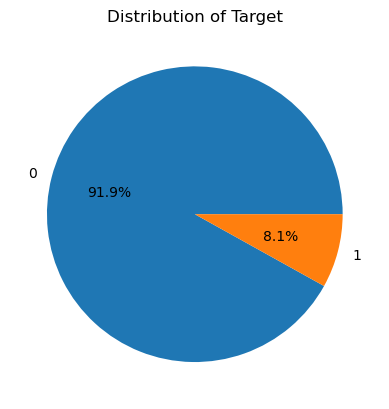

In [9]:
# Menghitung jumlah masing-masing nilai target
target_counts = app_train['TARGET'].value_counts()

# Memplot distribusi target dalam bentuk pie plot
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%')

# Memberikan judul plot
plt.title('Distribution of Target')

# Menampilkan plot
plt.show()

Insight :


Dapat dilihat bahwa data sangat imbalance dan data menunjukan 91.9% customer di Home Credit bisa membayar credit tentu secara bisnis ini masih sangat baik terhadap profit dan cashflow perusahaan.

### Gender

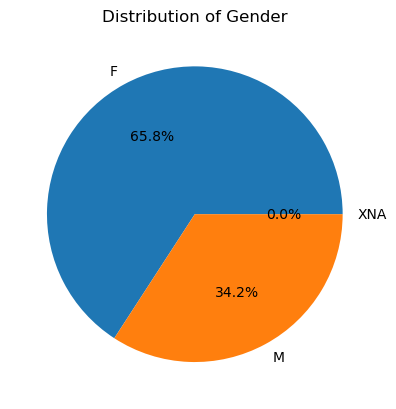

In [10]:
# Menghitung jumlah masing-masing jenis kelamin (mengabaikan NaN)
gender_count = app_train['CODE_GENDER'].value_counts(dropna=True)

# Memplot hubungan antara CODE_GENDER dan seluruh data dalam bentuk pie plot
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')

# Memberikan judul plot
plt.title('Distribution of Gender')

# Menampilkan plot
plt.show()

Insight: 

65.8% Customer Home Credit adalah wanita. Maka dapat disimpulkan bahwa wanita adalah gender yang paling banyak menggunakan credit 

### Gender terhadap Target

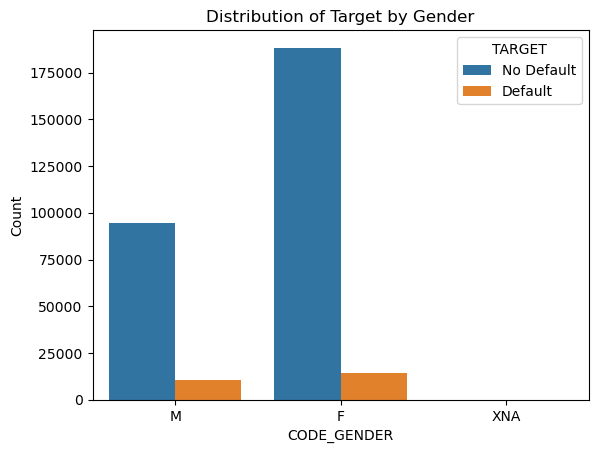

In [11]:
# Memplot hubungan antara CODE_GENDER dan TARGET
sns.countplot(data=app_train, x='CODE_GENDER', hue='TARGET')

# Memberikan label pada sumbu x dan y
plt.xlabel('CODE_GENDER')
plt.ylabel('Count')

# Memberikan judul plot
plt.title('Distribution of Target by Gender')

# Menampilkan legend
plt.legend(title='TARGET', labels=['No Default', 'Default'])

# Menampilkan plot
plt.show()


Insight :

berikut adalah distribusi Pria dan wanita dalam hal credit macet dan lancar. Berbedaan gender tidak mempengaruhi customer tersebut bisa bayar kredit atau tidak

### Name Contract Type

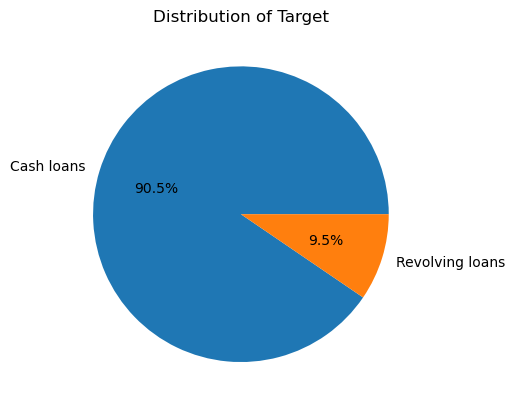

In [12]:
# Menghitung jumlah masing-masing nilai target
name_contract = app_train['NAME_CONTRACT_TYPE'].value_counts()

# Memplot distribusi target dalam bentuk pie plot
plt.pie(name_contract, labels=name_contract.index, autopct='%1.1f%%')

# Memberikan judul plot
plt.title('Distribution of Target')

# Menampilkan plot
plt.show()

Insight : 

Jumlah entri yang jauh lebih tinggi untuk "Cash loans" dibandingkan dengan "Revolving loans" menunjukkan bahwa jenis pinjaman tunai lebih umum atau lebih sering digunakan dibandingkan dengan jenis pinjaman berputar dalam dataset tersebut.

### Occupation Type

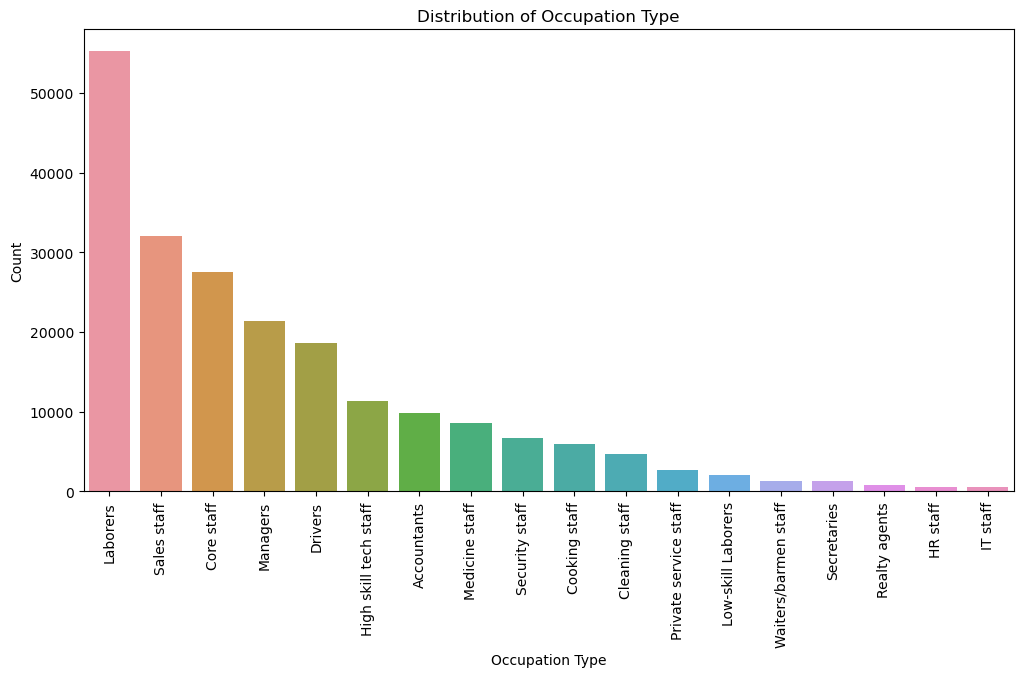

In [13]:
# Menghapus data dengan nilai NaN pada kolom OCCUPATION_TYPE
data_clean = app_train.dropna(subset=['OCCUPATION_TYPE'])

# Memplot distribusi OCCUPATION_TYPE dalam bentuk countplot
plt.figure(figsize=(12, 6))  # Mengatur ukuran plot
sns.countplot(x='OCCUPATION_TYPE', data=data_clean, order=data_clean['OCCUPATION_TYPE'].value_counts().index)

# Memberikan label pada sumbu x dan y
plt.xlabel('Occupation Type')
plt.ylabel('Count')

# Menampilkan plot
plt.xticks(rotation=90)  # Memutar label sumbu x agar mudah dibaca
plt.title('Distribution of Occupation Type')
plt.show()

Insight : 

`Laborers` adalah jenis pekerjaan yang paling banyak menggunakan Home Credit. Dapat disimpulkan bahwa `laborers` menjadi customer terbanyak diperusahan Home Credit

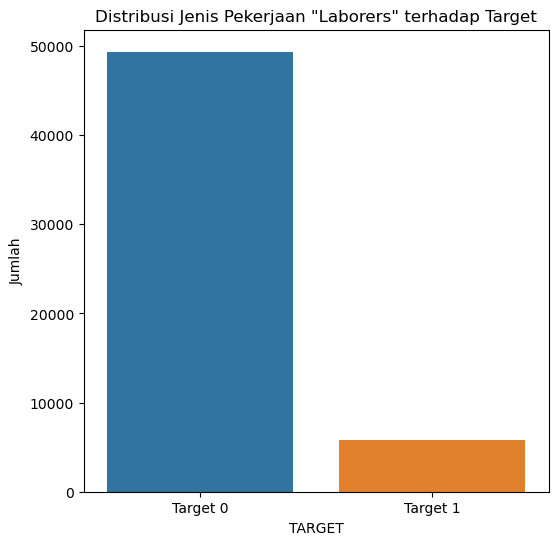

In [14]:
# Memfilter data berdasarkan OCCUPATION_TYPE 'laborers'
data_filtered = app_train[app_train['OCCUPATION_TYPE'] == 'Laborers']

# Memplot value counts dari 'TARGET' untuk jenis pekerjaan 'laborers' menggunakan Seaborn
plt.figure(figsize=(6, 6))
sns.countplot(x='TARGET', data=data_filtered)

# Menetapkan label untuk sumbu x dan y
plt.xlabel('TARGET')
plt.ylabel('Jumlah')

# Menetapkan label untuk nilai sumbu x berdasarkan target
plt.xticks([0, 1], ['Target 0', 'Target 1'])

# Menetapkan judul plot
plt.title('Distribusi Jenis Pekerjaan "Laborers" terhadap Target')

# Menampilkan plot
plt.show()

Insight :

Selain menjadi jenis pekerjaan terbanyak `Laborers` juga terbilang baik dalam melakukan pembayara credit. Sehingga dapat disimpulkan bahwa para `laborers` menjadi target customer terbaik 

### Distribusi gender dan occupation type terhadap target

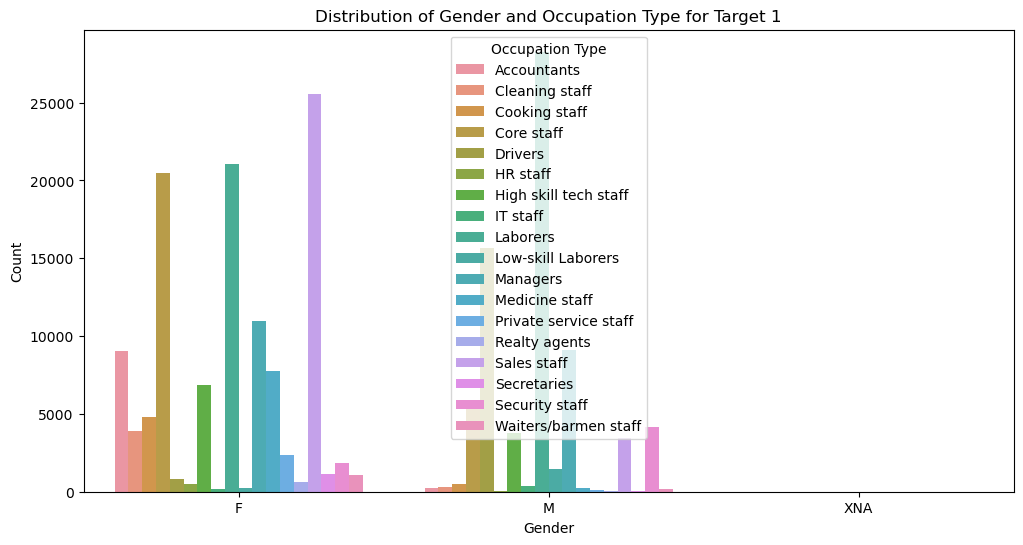

In [15]:
# Filter data berdasarkan target = 0
filter = app_train[app_train['TARGET'] == 0]

# Grouping berdasarkan gender dan occupation_type dan menghitung jumlah observasi
group_target = filter.groupby(['CODE_GENDER', 'OCCUPATION_TYPE']).size().reset_index(name='Count')

# Membuat plot menggunakan bar plot dari Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='CODE_GENDER', y='Count', hue='OCCUPATION_TYPE', data=group_target)

# Menetapkan label pada sumbu x dan y
plt.xlabel('Gender')
plt.ylabel('Count')

# Menetapkan judul plot
plt.title('Distribution of Gender and Occupation Type for Target 1')

# Menampilkan legenda
plt.legend(title='Occupation Type')

# Menampilkan plot
plt.show()

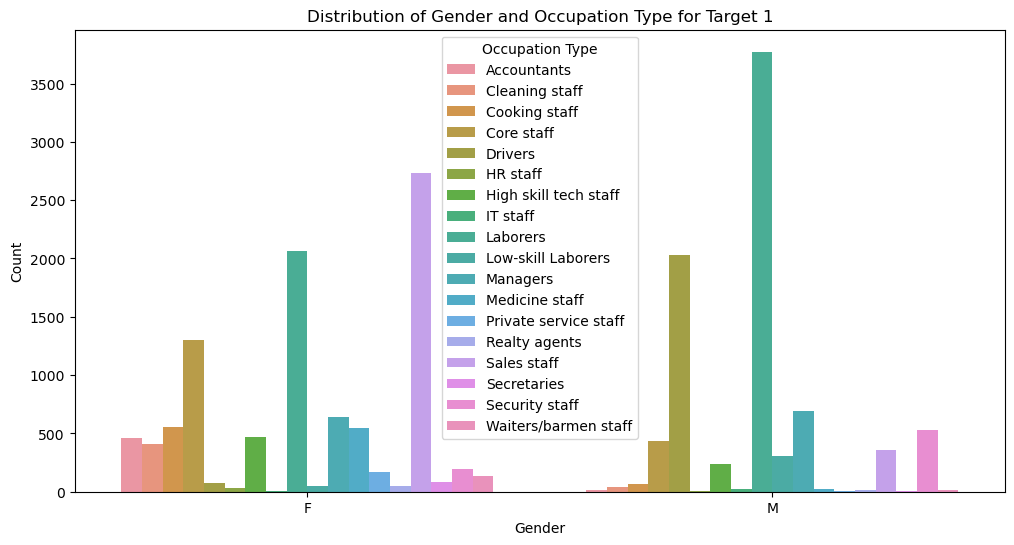

In [16]:
# Filter data berdasarkan target = 1
filter = app_train[app_train['TARGET'] == 1]

# Grouping berdasarkan gender dan occupation_type dan menghitung jumlah observasi
group_target = filter.groupby(['CODE_GENDER', 'OCCUPATION_TYPE']).size().reset_index(name='Count')

# Membuat plot menggunakan bar plot dari Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='CODE_GENDER', y='Count', hue='OCCUPATION_TYPE', data=group_target)

# Menetapkan label pada sumbu x dan y
plt.xlabel('Gender')
plt.ylabel('Count')

# Menetapkan judul plot
plt.title('Distribution of Gender and Occupation Type for Target 1')

# Menampilkan legenda
plt.legend(title='Occupation Type')

# Menampilkan plot
plt.show()

Insight :

Berdasarkan data tersebut, terlihat bahwa ada perbedaan dalam tingkat kredit macet antara jenis pekerjaan dan jenis kelamin tertentu. Misalnya, wanita dengan pekerjaan sales staff cenderung memiliki jumlah kredit macet yang lebih tinggi, sedangkan pria dengan pekerjaan laborer memiliki jumlah kredit macet yang paling tinggi.

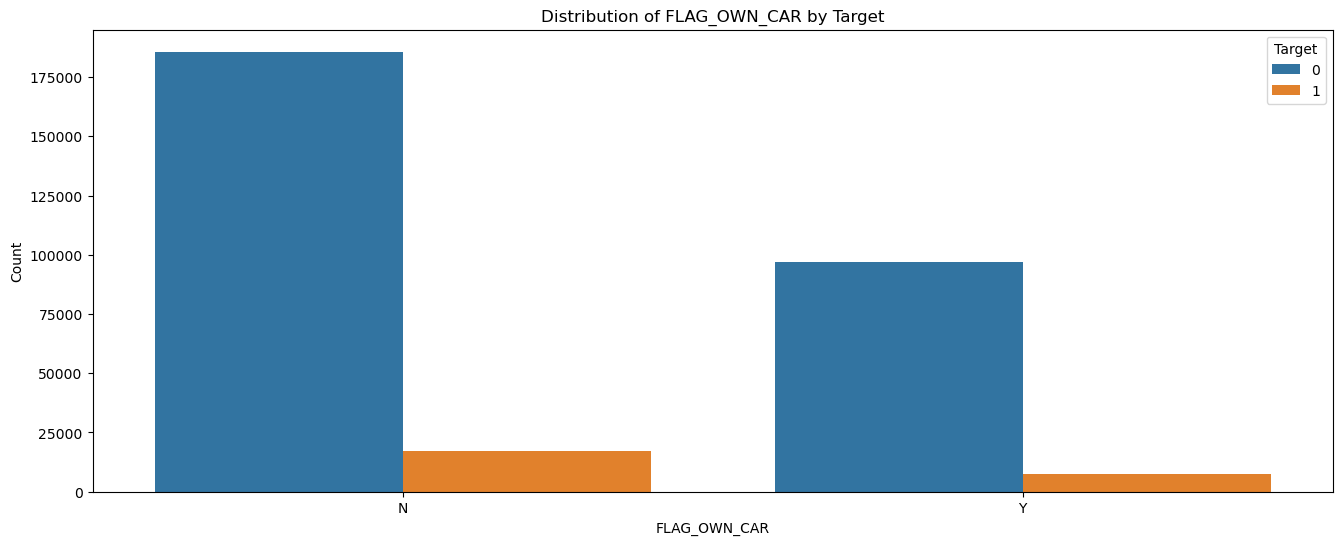

In [17]:
plot_column_distribution(app_train,'FLAG_OWN_CAR')

Insight :

Pengguna yang memiliki mobil/tidak, tidak mempengaruhi pengguna dapat membayar credit atau tidak

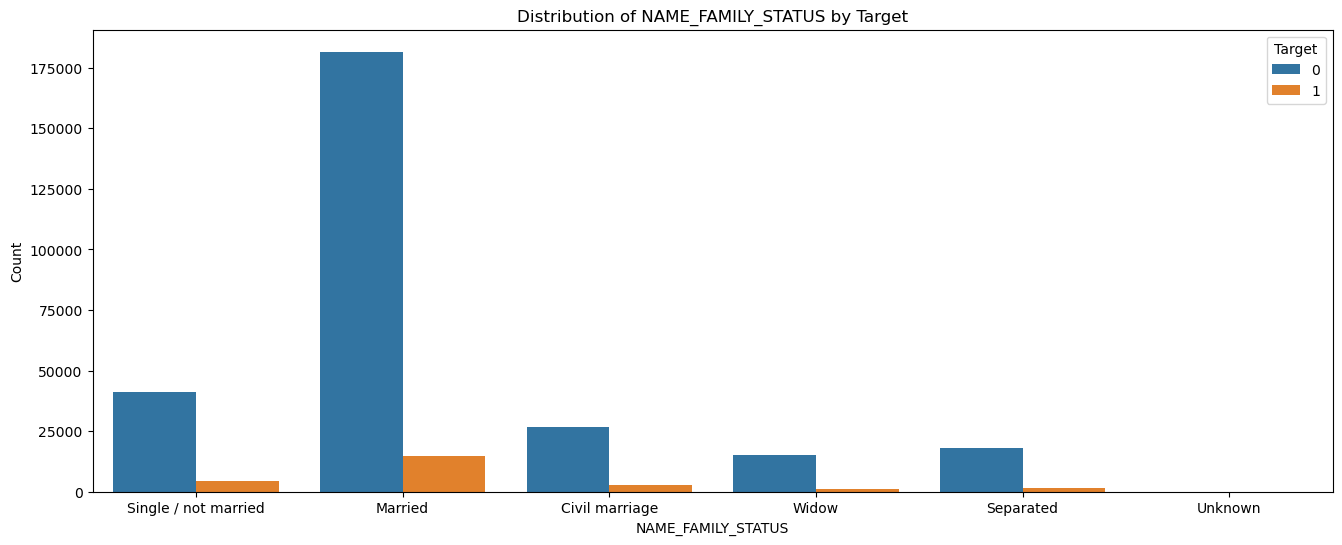

In [18]:
plot_column_distribution(app_train,'NAME_FAMILY_STATUS')

Insight :

Pelanggan yang sudah 'Married' memiliki peluang tidak bisa membayar kredit yang signifikan.

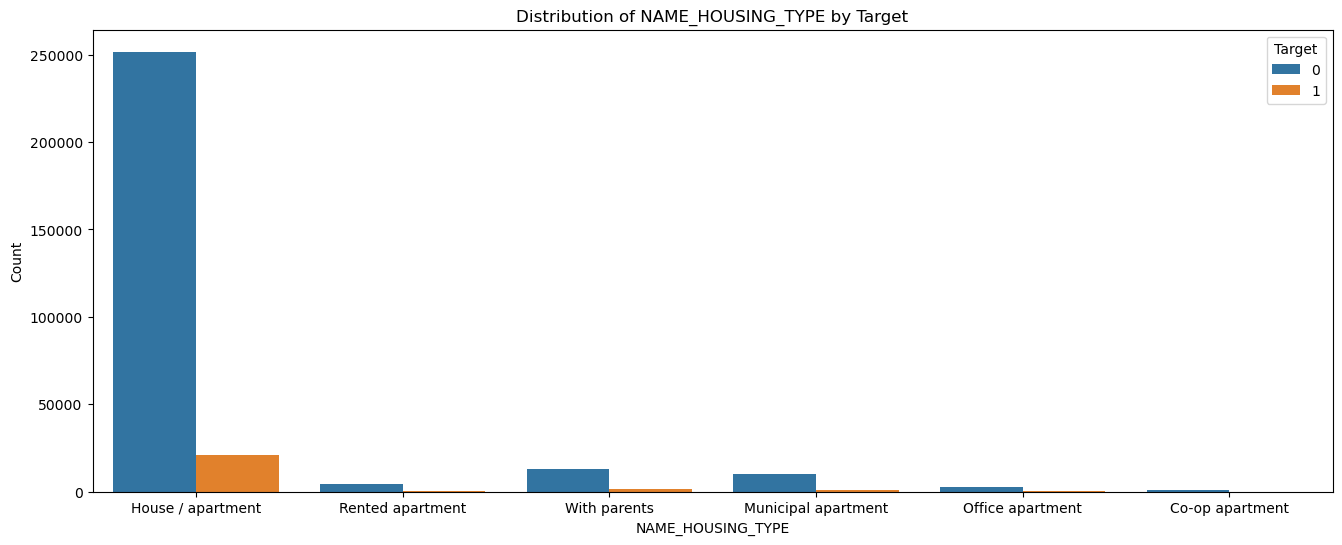

In [19]:
plot_column_distribution(app_train,'NAME_HOUSING_TYPE')

Insight : 

Customer yang memiliki rumah cukup signifikan dalam tidak bisa membayar kredit

### Age

Untuk mendefine umur

In [20]:
# define age columns
app_train['AGE'] = app_train['DAYS_BIRTH'] / -365
app_train['AGE'] = app_train['AGE'].apply(round)

## Overall Analysis

1. Kondisi Keuangan Pelanggan: Sebagian besar pelanggan Home Credit, yaitu 91.9%, memiliki kemampuan untuk membayar kredit mereka. Hal ini mengindikasikan bahwa sebagian besar pelanggan memiliki kondisi keuangan yang stabil dan mampu memenuhi kewajiban pembayaran kredit.

2. Gender dan Penggunaan Kredit: Wanita memiliki andil yang signifikan dalam penggunaan kredit, dengan 65.8% pelanggan Home Credit adalah wanita. Hal ini menunjukkan bahwa wanita memiliki kebutuhan yang lebih tinggi dalam menggunakan kredit untuk memenuhi kebutuhan keuangan mereka.

3. Jenis Pinjaman: Cash loans (pinjaman tunai) adalah jenis pinjaman yang paling umum digunakan oleh pelanggan Home Credit, dengan jumlah entri yang jauh lebih tinggi dibandingkan dengan revolving loans (pinjaman berputar). Hal ini menunjukkan bahwa pelanggan lebih cenderung memilih pinjaman tunai daripada pinjaman berputar.

4. Pekerjaan dan Penggunaan Kredit: Pekerjaan dengan jumlah pelanggan terbanyak adalah "Laborers" (pekerja kasar/fisik). Pekerjaan ini mungkin membutuhkan tambahan dana atau kredit untuk memenuhi kebutuhan sehari-hari mereka. Oleh karena itu, pekerjaan ini menjadi target utama bagi Home Credit.

5. Tingkat Pembayaran Kredit: Meskipun terdapat perbedaan dalam tingkat kredit macet antara jenis pekerjaan dan gender tertentu, kesimpulan utama adalah bahwa tidak ada faktor tunggal yang secara signifikan mempengaruhi kemampuan pelanggan untuk membayar kredit mereka. Artinya, faktor seperti jenis pekerjaan atau gender tidak dapat dijadikan prediktor tunggal dalam menentukan apakah seseorang akan membayar kredit atau tidak.

## Rekomendasi



Mengingat mayoritas pelanggan dapat membayar kredit, perusahaan dapat terus fokus pada menarik pelanggan baru dengan menawarkan produk dan layanan yang menarik.

Menyadari bahwa wanita merupakan segmen pelanggan yang dominan, perusahaan dapat mengembangkan strategi pemasaran yang lebih terfokus untuk menarik lebih banyak pelanggan wanita.

Meskipun cash loans lebih umum, perusahaan dapat mempertimbangkan untuk mengoptimalkan penawaran revolving loans untuk memberikan variasi kepada pelanggan.

Mengingat "Laborers" adalah jenis pekerjaan yang paling banyak digunakan, perusahaan dapat mengembangkan program khusus atau penawaran yang sesuai untuk menarik dan mempertahankan pelanggan dengan pekerjaan ini.

Meskipun tidak ada faktor tunggal yang signifikan dalam memprediksi pembayaran kredit, perusahaan dapat terus memperkuat analisis risiko dan keuangan untuk mengidentifikasi faktor-faktor lain yang mungkin mempengaruhi pembayaran kredit.

## Feature Engineering

## check missing value

saya berasumsi bahwa -1001, XNA, Unknown juga sebuah missing value

In [21]:
app_train.replace(-1001,np.nan, inplace=True) # pada kolom year emloyed
app_train.replace('XNA', np.nan, inplace=True) # pada kolom gender
app_train.replace('Unknown', np.nan, inplace=True) #    

In [22]:
def missing_value_summary(data):
    # Menghitung jumlah nilai yang hilang per kolom
    missing_count = data.isnull().sum()

    # Menghitung presentase nilai yang hilang per kolom
    missing_percentage = (missing_count / len(data)) * 100

    # Membuat dataframe dengan kolom "Kolom", "Jumlah Missing", dan "Presentase Missing"
    missing_df = pd.DataFrame({'Kolom': missing_count.index, 'Jumlah Missing': missing_count.values, 'Presentase Missing': missing_percentage.values})

    # Menghapus baris dengan jumlah missing value = 0
    missing_df = missing_df[missing_df['Jumlah Missing'] > 0]

    # Mengurutkan dataframe berdasarkan kolom "Jumlah Missing" secara menurun
    missing_df = missing_df.sort_values('Jumlah Missing', ascending=False)

    return missing_df



In [23]:
missing = missing_value_summary(app_train)
missing

,Kolom,Jumlah Missing,Presentase Missing
48,COMMONAREA_AVG,214865,69.872297
62,COMMONAREA_MODE,214865,69.872297
76,COMMONAREA_MEDI,214865,69.872297
70,NONLIVINGAPARTMENTS_MODE,213514,69.432963
84,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
...,...,...,...
19,DAYS_REGISTRATION,46,0.014959
9,AMT_ANNUITY,12,0.003902
3,CODE_GENDER,4,0.001301
29,CNT_FAM_MEMBERS,2,0.000650


Berdasarkan asumsi pribadi saya akan mendrop kolom yang missing value nya diatas 40 %

In [24]:
threshold = 40  # Set the threshold percentage

# Calculate the percentage of missing values for each column
missing_percentages = (app_train.isnull().sum() / len(app_train)) * 100

# Filter columns with missing values greater than the threshold
filtered_columns = missing_percentages[missing_percentages > threshold].index.tolist()

# Print the filtered columns
filtered_columns

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

## Drop Coloums

Berdasarkan asumsi pribadi saya akan mendrop kolom yang menurut saya tidak diperlukan

In [25]:
x = app_train.drop(['SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'], axis=1)


In [26]:
x = x.drop(filtered_columns, axis=1)
x

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,26
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,NaN,0.115992,NaN,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,57
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.535722,0.218859,6.0,0.0,6.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1

## split X dan Y

In [27]:
# split X dan Y
X = x.drop(['TARGET'], axis=1)
y = x['TARGET']

In [28]:
# melihat ukuran X
X.shape

(307511, 67)

## split train dan test

In [29]:
# split train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)


Train Size :  (246008, 67)
Test Size  :  (61503, 67)


In [30]:
# mereset index train dan test
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

## split columns katagori dan numerikal

In [31]:
# membuat list columns
list_columns = X_train.columns.to_list()

In [32]:
# splitting columns based on dtypes
cat_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 
               'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 
               'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
               'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
               'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
               'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 
               'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
               'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
               'FLAG_DOCUMENT_21',]


num_columns = [col for col in list_columns if col not in cat_columns]

## Handling Outlier 

#### Check distribusi data

In [33]:

def plot_distribution(data, num_columns):
    # Looping untuk setiap kolom numerik dalam list num_columns
    for column in num_columns:
        # Membuat figure dengan 2 subplot (box plot dan histogram)
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

        # Box plot
        data.boxplot(column=column, ax=axes[0])
        axes[0].set_title('Box Plot')

        # Histogram
        data[column].hist(ax=axes[1])
        axes[1].set_title('Histogram')

        # Menghitung nilai skewness
        skewness = data[column].skew()

        # Menampilkan nilai skewness
        axes[1].text(0.95, 0.95, f"Skewness: {skewness:.2f}", transform=axes[1].transAxes,
                     horizontalalignment='right', verticalalignment='top')

        # Mengatur judul figure berdasarkan nama kolom
        fig.suptitle(f'Distribusi Data - {column}')

        # Menampilkan plot
        plt.show()


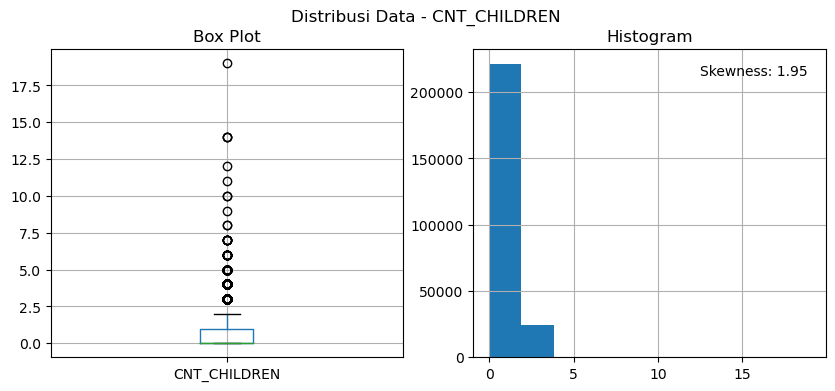

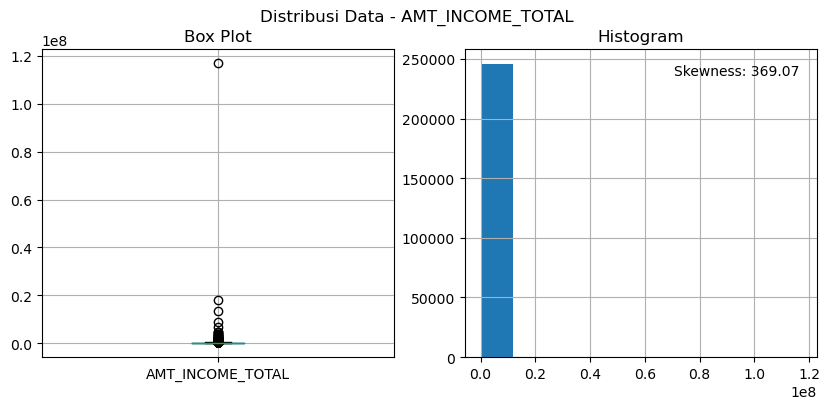

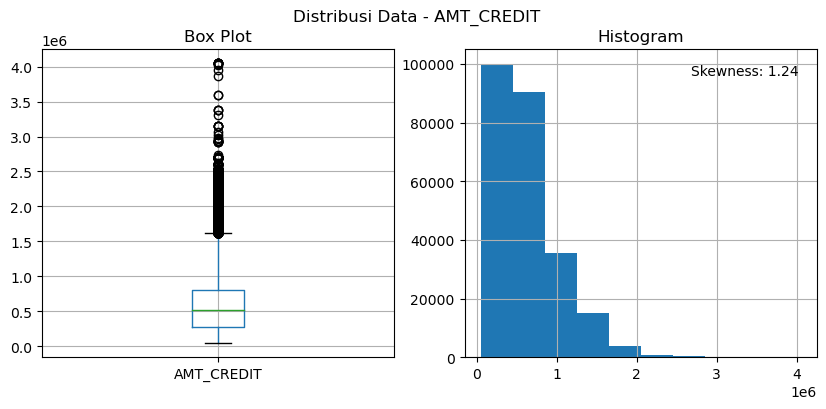

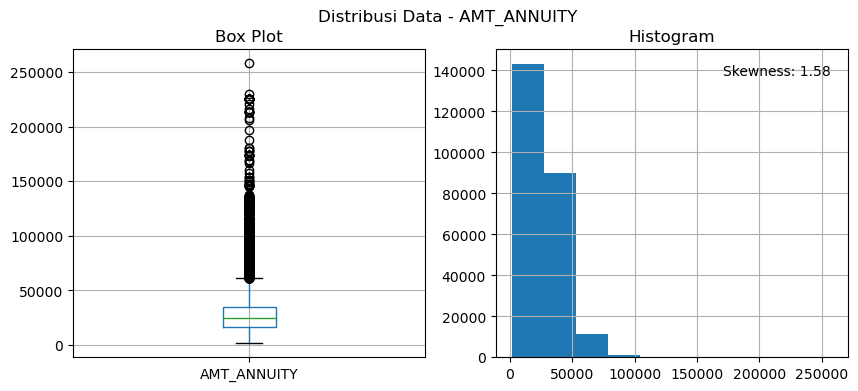

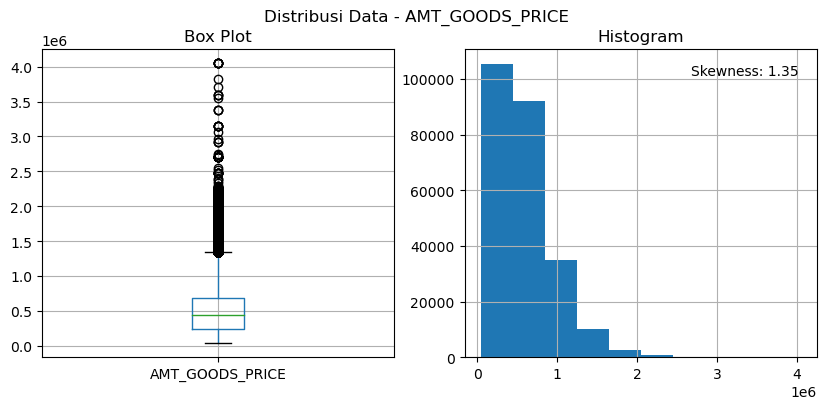

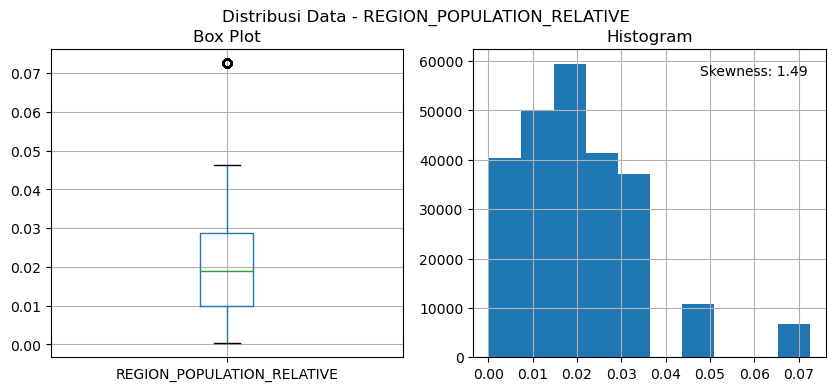

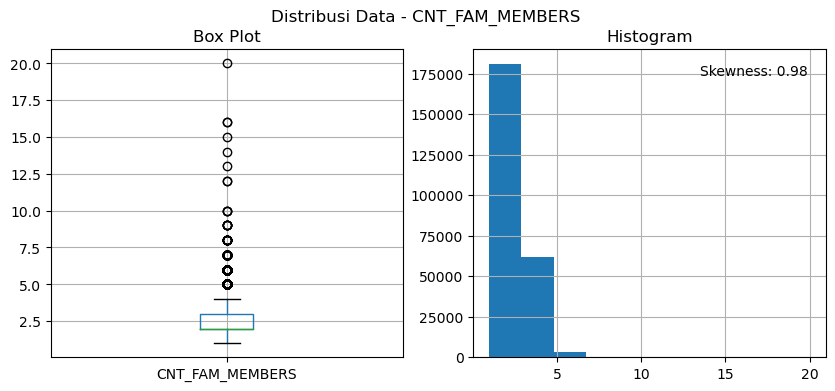

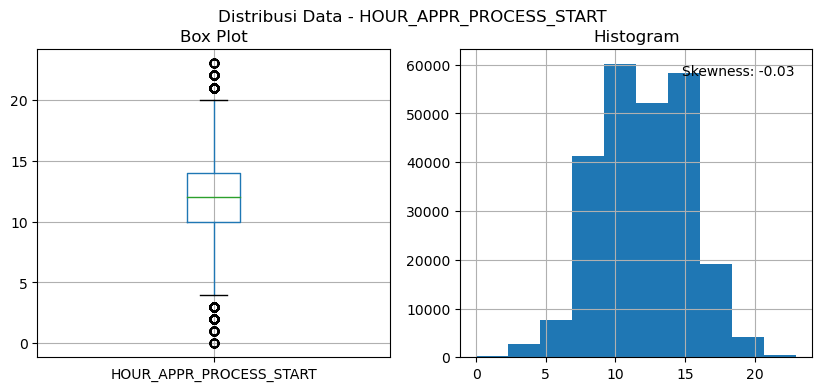

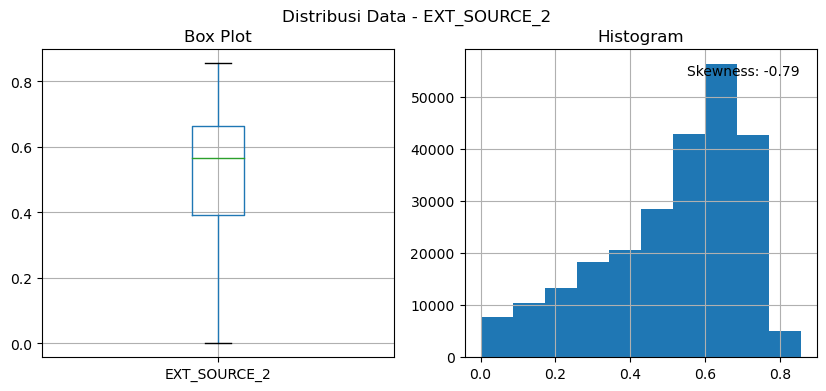

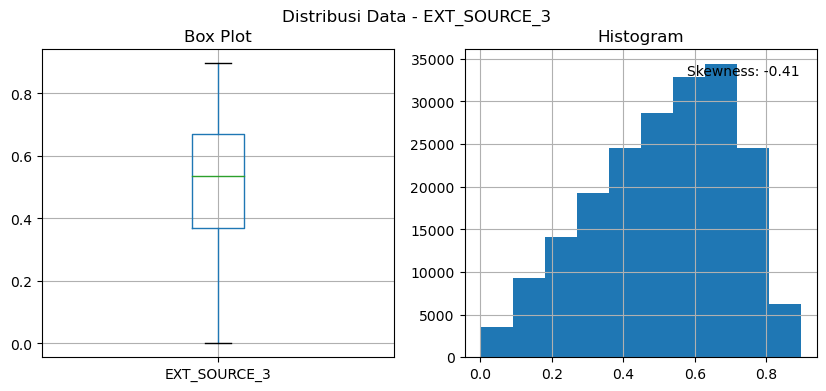

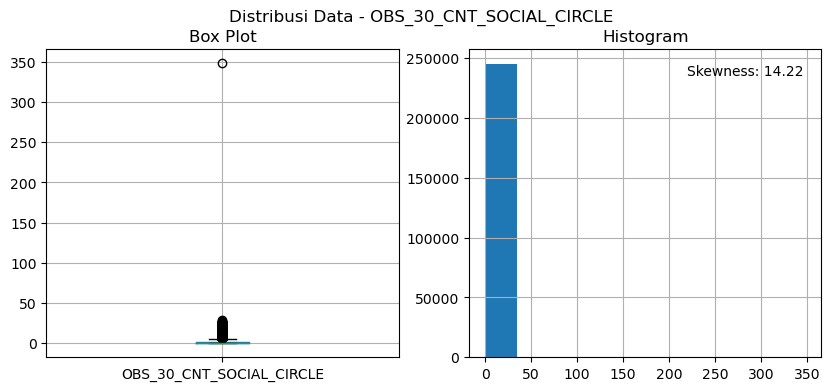

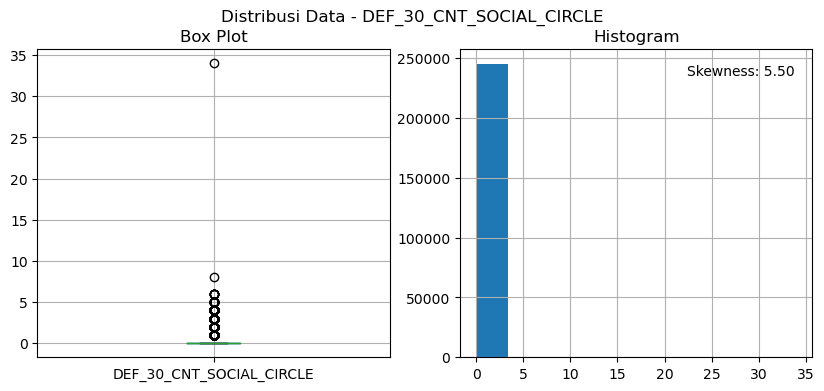

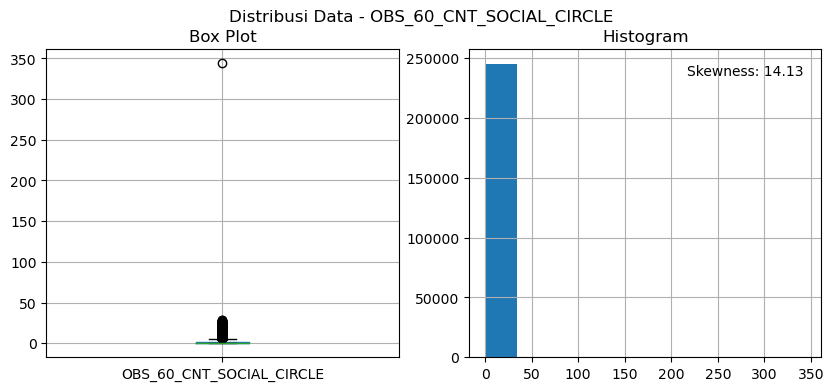

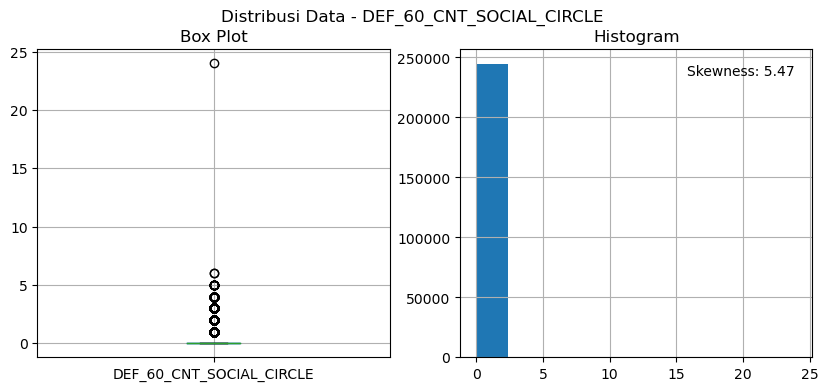

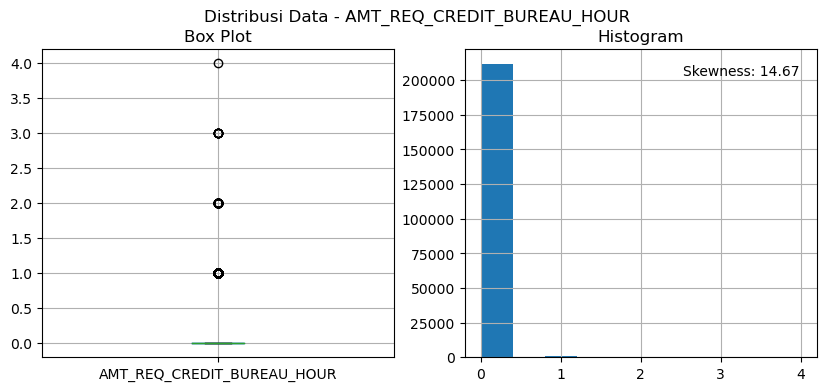

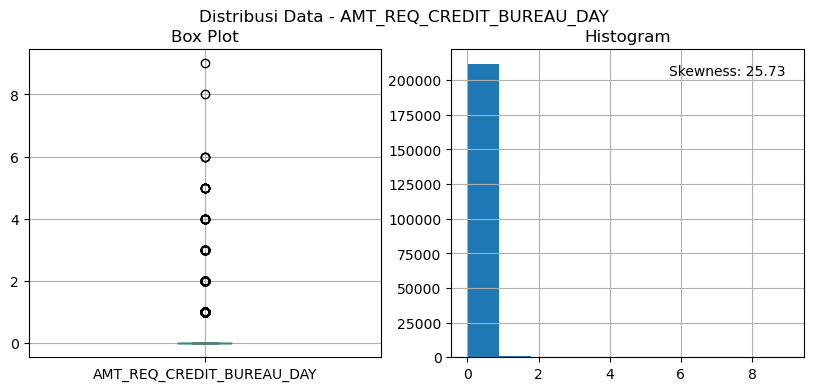

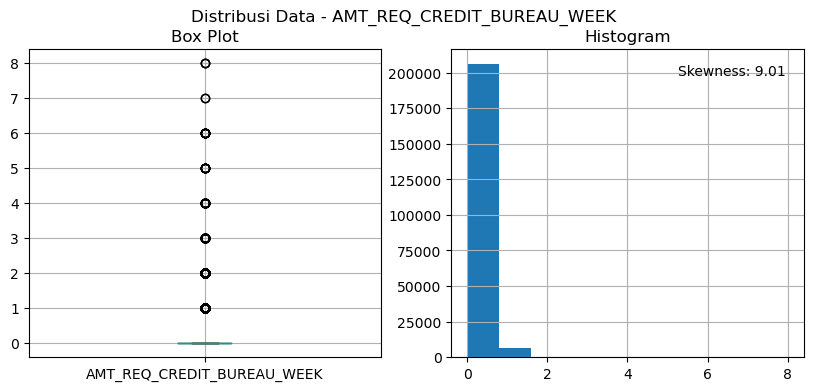

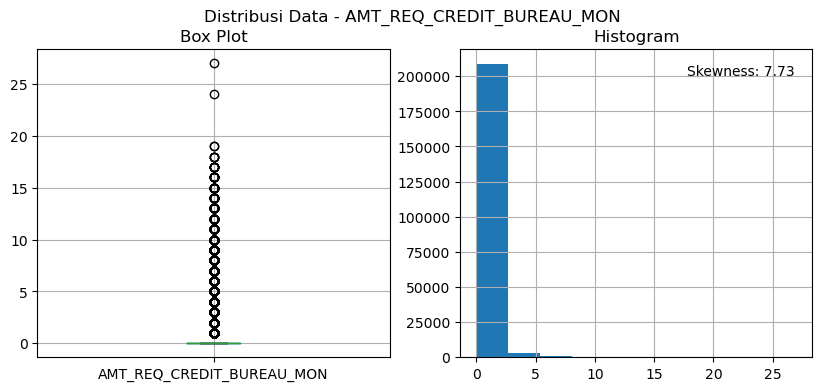

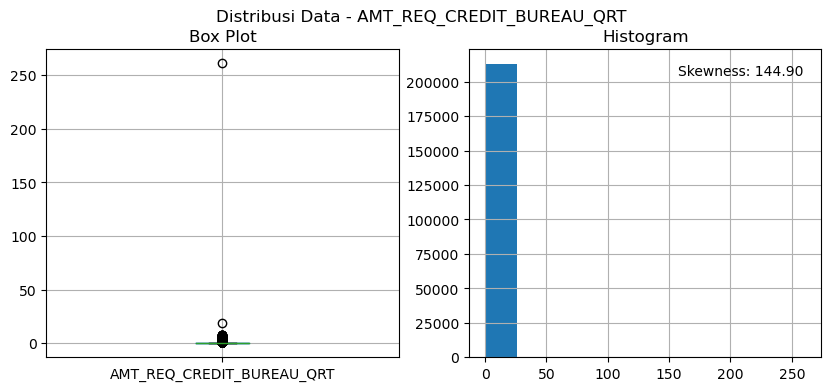

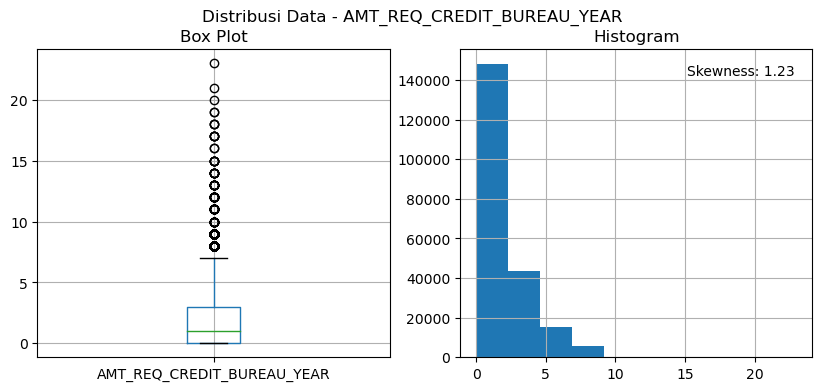

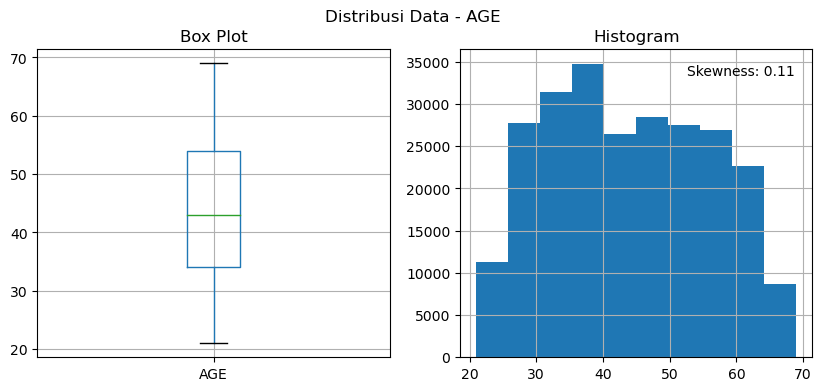

In [34]:
# Memanggil fungsi plot_distribution dengan DataFrame yang diinginkan dan list kolom numerik
plot_distribution(X_train, num_columns)

berdasarkan boxplot dan nilai skewness distribusi kolom `AGE`,`HOUR_APPR_PROSESS_START`,`EXIT_SOURCE`,`YEAR_ID_PUBLISH` dinyatakakn normal karena tingkat skewness diangkat -+ 0.05 

## Split distribusi normal dan tidak normal

In [35]:
# membuat variabel distribusi normal dan tidak normal

normal = ['AGE','HOUR_APPR_PROCESS_START','EXT_SOURCE_3']

non_normal = [col for col in num_columns if col not in normal]

## Handling Missing Values

In [36]:
# missing value pada X_train
missing_values = missing_value_summary(X_train)
missing_values

,Kolom,Jumlah Missing,Presentase Missing
21,OCCUPATION_TYPE,77412,31.467269
35,EXT_SOURCE_3,48647,19.774560
33,ORGANIZATION_TYPE,44491,18.085184
65,AMT_REQ_CREDIT_BUREAU_YEAR,33154,13.476798
64,AMT_REQ_CREDIT_BUREAU_QRT,33154,13.476798
63,AMT_REQ_CREDIT_BUREAU_MON,33154,13.476798
62,AMT_REQ_CREDIT_BUREAU_WEEK,33154,13.476798
61,AMT_REQ_CREDIT_BUREAU_DAY,33154,13.476798
60,AMT_REQ_CREDIT_BUREAU_HOUR,33154,13.476798
9,NAME_TYPE_SUITE,1019,0.414214


In [37]:
# missing value pada X_test
missing_values = missing_value_summary(X_test)
missing_values

,Kolom,Jumlah Missing,Presentase Missing
21,OCCUPATION_TYPE,18979,30.858657
35,EXT_SOURCE_3,12318,20.028291
33,ORGANIZATION_TYPE,10883,17.695072
65,AMT_REQ_CREDIT_BUREAU_YEAR,8365,13.600963
64,AMT_REQ_CREDIT_BUREAU_QRT,8365,13.600963
63,AMT_REQ_CREDIT_BUREAU_MON,8365,13.600963
62,AMT_REQ_CREDIT_BUREAU_WEEK,8365,13.600963
61,AMT_REQ_CREDIT_BUREAU_DAY,8365,13.600963
60,AMT_REQ_CREDIT_BUREAU_HOUR,8365,13.600963
9,NAME_TYPE_SUITE,273,0.443881


## Simple Imputer

#### numerical columns

In [38]:
# simple imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train_normal = imputer.fit_transform(X_train[normal])
X_test_normal = imputer.transform(X_test[normal])

In [39]:
imputer_non = SimpleImputer(missing_values=np.nan, strategy='median')

X_train_non = imputer.fit_transform(X_train[non_normal])
X_test_non = imputer.transform(X_test[non_normal])

#### Catagorical columns

In [40]:
imputer_cat = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

X_train_cat = imputer_cat.fit_transform(X_train[cat_columns])
X_test_cat = imputer_cat.transform(X_test[cat_columns])

#### Outlier

In [41]:
outlier_normal = Winsorizer(capping_method='gaussian', fold=3 , tail='both')

X_train_normal = outlier_normal.fit_transform(X_train_normal)
X_test_normal = outlier_normal.transform(X_test_normal)


In [42]:
outlier_non = Winsorizer(capping_method='iqr', fold=3, tail='both',
                         variables=['x0','x1','x2','x3','x4','x5','x6','x7','x8','x10','x15','x16','x17'])

X_train_non = outlier_non.fit_transform(X_train_non)
X_test_non = outlier_non.transform(X_test_non)

#### Feature Scaling

In [43]:
normal_scaler = StandardScaler()

X_train_normal = normal_scaler.fit_transform(X_train_normal)
X_test_normal = normal_scaler.transform(X_test_normal)

In [44]:
non_normal_scaler = MinMaxScaler()

X_train_non = non_normal_scaler.fit_transform(X_train_non)
X_test_non = non_normal_scaler.transform(X_test_non)

#### create dataframe

In [45]:
X_train_normal = pd.DataFrame(X_train_normal, columns=normal)
X_test_normal = pd.DataFrame (X_test_normal , columns=normal)

X_train_non = pd.DataFrame(X_train_non , columns=non_normal)
X_test_non = pd.DataFrame(X_test_non , columns=non_normal)


In [46]:
X_train_cat = pd.DataFrame (X_train_cat, columns=cat_columns)
X_test_cat = pd.DataFrame (X_test_cat, columns=cat_columns)

#### reset index

In [47]:
X_train_normal.reset_index(drop=True , inplace=True)
X_test_normal.reset_index(drop=True , inplace=True)

X_train_non.reset_index(drop=True , inplace=True)
X_test_non.reset_index(drop=True , inplace=True)

X_train_cat.reset_index(drop=True , inplace=True)
X_test_cat.reset_index(drop=True , inplace=True)

#### concat columns

In [48]:
X_train = pd.concat([X_train_normal,X_train_non,X_train_cat], axis=1)
X_test = pd.concat([X_test_normal,X_test_non,X_test_cat], axis=1)

In [49]:
X_train

,AGE,HOUR_APPR_PROCESS_START,EXT_SOURCE_3,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,-0.998863,1.208346,0.251856,0.00,0.123867,0.247538,0.244004,0.224771,0.129705,0.0,0.368859,0.000,0.000000,0.000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.333333,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,0,1,Laborers,2,2,SATURDAY,0,0,0,0,1,1,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.590625,-0.324232,0.403781,0.00,0.133938,0.094365,0.119037,0.094037,0.260475,0.2,0.783678,0.000,0.000000,0.000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.333333,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,1,1,0,Laborers,2,2,THURSDAY,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.497672,-0.324232,1.100632,0.25,0.264854,0.323181,0.282428,0.325688,0.361433,0.4,0.840118,0.000,0.000000,0.000,0.000000,0.00,0.0,0.0,1.0,0.000000,0.111111,Cash loans,F,N,N,Children,Working,Higher education,Married,House / apartment,1,1,0,1,1,0,High skill tech staff,2,2,FRIDAY,0,0,0,0,0,0,Business Entity Type 2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-1.165927,-0.937263,-1.693311,0.25,0.395770,0.377080,0.401465,0.323394,0.276330,0.4,0.437718,0.125,0.029412,0.125,0.041667,0.00,0.0,0.0,0.0,0.000000,0.111111,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,Municipal apartment,1,1,0,1,0,0,Accountants,3,3,MONDAY,0,0,0,0,0,0,Other,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.421178,0.595315,-0.375326,0.00,0.415911,0.296899,0.233328,0.362385,0.093190,0.2,0.747855,0.000,0.000000,0.000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.333333,Cash loans,F,N,N,"Spouse, partner",Working,Secondary / secondary special,Married,With parents,1,1,0,1,0,0,Laborers,2,2,MONDAY,0,0,0,0,1,1,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,-1.082395,-0.017716,-1.391678,0.25,0.345418,0.171199,0.314302,0.169725,0.157398,0.4,0.781719,0.125,0.029412,0.125,0.041667,0.00,0.0,0.0,0.0,0.000000,0.333333,Cash loans,M,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,1,1,1,0,Laborers,1,1,TUESDAY,0,1,1,0,1,1,Construction,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
246004,0.838838,0.288800,-0.108173,0.00,0.144008,0.039992,0.097220,0.038991,0.260475,0.2,0.863730,0.125,0.000000,0.125,0.000000,0.00,0.0,0.0,0.0,0.941349,0.777778,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,1,0,0,Sales 

#### SMOTE

In [50]:
smotenc = SMOTENC ([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66], random_state=7)
X_train_new , y_train_new = smotenc.fit_resample(X_train, y_train)
y_train_new.value_counts() 

0    226148
1    226148
Name: TARGET, dtype: int64

#### Encoding

In [51]:
enc_col = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 
           'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 
           'WEEKDAY_APPR_PROCESS_START']

non_enc = [col for col in cat_columns if col not in enc_col]

In [52]:
X_train_new1 = X_train_new[normal]
X_train_new2 = X_train_new[non_normal]

X_train_new_enc = X_train_new[enc_col]
X_train_new_non = X_train_new[non_enc]

In [53]:
X_test_new1 = X_test[normal]
X_test_new2 = X_test[non_normal]


X_test_enc = X_test[enc_col]
X_test_non = X_test[non_enc]


#### OneHot Encoding

In [54]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_new_enc = ohe.fit_transform(X_train_new_enc)
X_test_enc = ohe.transform(X_test_enc)

C:\Users\maddi\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [55]:
feature_names = ohe.get_feature_names_out(input_features=enc_col)

X_train_new_enc = pd.DataFrame(X_train_new_enc, columns=feature_names)
X_test_enc = pd.DataFrame(X_test_enc, columns=feature_names)

In [56]:
X_train_new_enc.reset_index(drop=True , inplace=True)
X_test_enc.reset_index(drop=True, inplace=True)

#### concat columns

In [57]:
X_train_final = pd.concat([X_train_new1, X_train_new2, X_train_new_enc, X_train_new_non], axis=1)
X_test_final = pd.concat([X_test_new1, X_test_new2, X_test_enc, X_test_non], axis=1)

In [58]:
X_train_array = X_train_final.values
X_test_array = X_test_final.values

## Model Definition

Berdasarkan rekomendasi dari para pemenang sebelumnya, Model yang akan saya gunakan pada project kali ini adalah LogisticRegression, XGBoost dan Random Forest

### Logistic Regression

In [73]:
logreg_model = LogisticRegression()
xgb_model = XGBClassifier(objective="binary:logistic", random_state=7)
rf_model = RandomForestClassifier(random_state=7)

In [60]:
# Train the model
logreg_model.fit(X_train_array, y_train_new)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_array)


C:\Users\maddi\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


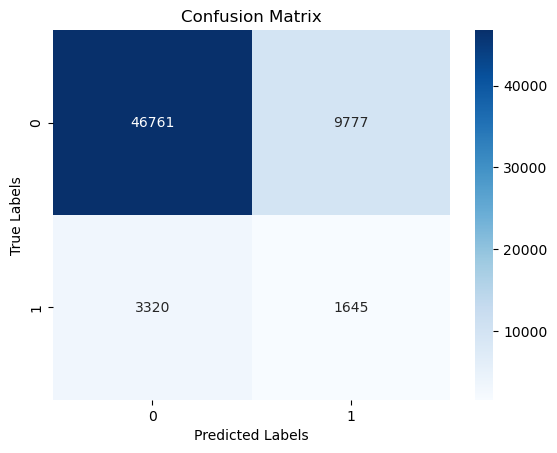

ROC AUC Score: 0.5792


In [64]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score: %.4f" % roc_auc)

### XGBoost

In [65]:
# Train the model
xgb_model.fit(X_train_array, y_train_new)

# Make predictions on the test set
y_pred2 = xgb_model.predict(X_test_array)


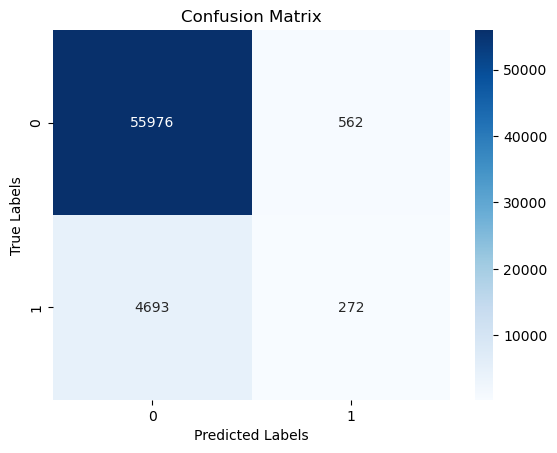

ROC AUC Score: 0.5224


In [66]:
# Calculate the confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)

# Display the confusion matrix as a heatmap
sns.heatmap(cm2, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred2)
print("ROC AUC Score: %.4f" % roc_auc)

### RandomForest

In [74]:
# Train the model
rf_model.fit(X_train_array, y_train_new)

# Make predictions on the test set
y_pred3 = rf_model.predict(X_test_array)


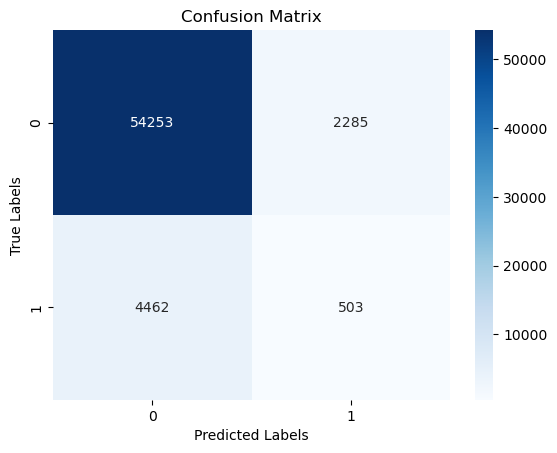

ROC AUC Score: 0.5304


In [75]:
# Calculate the confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)

# Display the confusion matrix as a heatmap
sns.heatmap(cm3, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred3)
print("ROC AUC Score: %.4f" % roc_auc)

### Model analysis

dari ketiga model yang digunakan Logistic Regression memiliki nilai ROC AUC yang lebih baik yaitu 57%

### Model Saving

In [106]:
# Save File

# Modelling
with open('logreg_model.pkl', 'wb') as file_1:
    pickle.dump(logreg_model, file_1)

# Pre-processing

with open('ohe.pkl', 'wb') as file_2:
    pickle.dump(ohe, file_2)
    
with open('normal_scaler.pkl', 'wb') as file_3:
    pickle.dump(normal_scaler, file_3)

with open('non_normal_scaler.pkl', 'wb') as file_4:
    pickle.dump(non_normal_scaler, file_4)

with open('outlier_normal.pkl', 'wb') as file_5:
    pickle.dump(outlier_normal, file_5)

with open('outlier_non.pkl', 'wb') as file_6:
    pickle.dump(outlier_non, file_6)
    
# List Numeric & Category
with open('normal.txt', 'w') as file_7:
    json.dump(normal, file_7)

with open('non_normal.txt', 'w') as file_8:
    json.dump(non_normal, file_8)
    
with open('enc_col.txt', 'w') as file_9:
    json.dump(enc_col, file_9)
    
with open('non_enc.txt', 'w') as file_10:
    json.dump(non_enc, file_10)

In [107]:
# Load Model

# Modelling
with open('logreg_model.pkl', 'rb') as file_1:
    logreg_model = pickle.load(file_1)

# Pre-processing

with open('ohe.pkl', 'rb') as file_2:
    ohe = pickle.load(file_2)
    
with open('normal_scaler.pkl', 'rb') as file_3:
    normal_scaler = pickle.load(file_3)

with open('non_normal_scaler.pkl', 'rb') as file_4:
    non_normal_scaler = pickle.load(file_4)

with open('outlier_normal.pkl', 'rb') as file_5:
    outlier_normal = pickle.load(file_5)

with open('outlier_non.pkl', 'rb') as file_6:
    outlier_non = pickle.load(file_6)
    
# List Numeric & Category
with open('normal.txt', 'r') as file_7:
    normal = json.load(file_7)

with open('non_normal.txt', 'r') as file_8:
    non_normal = json.load(file_8)
    
with open('enc_col.txt', 'r') as file_9:
    enc_col = json.load(file_9)
    
with open('non_enc.txt', 'r') as file_10:
    non_enc = json.load(file_10)

### Model Inferences

In [78]:
# define dataframe
app_test = pd.read_csv('application_test.csv')
pd.set_option('display.max_columns', None)

In [79]:
# define age columns
app_test['AGE'] = app_test['DAYS_BIRTH'] / -365
app_test['AGE'] = app_test['AGE'].apply(round)

In [81]:
# missing value statistic
missing_values = missing_value_summary(app_test)
missing_values.head(50)

,Kolom,Jumlah Missing,Presentase Missing
61,COMMONAREA_MODE,33495,68.716150
75,COMMONAREA_MEDI,33495,68.716150
47,COMMONAREA_AVG,33495,68.716150
83,NONLIVINGAPARTMENTS_MEDI,33347,68.412523
55,NONLIVINGAPARTMENTS_AVG,33347,68.412523
69,NONLIVINGAPARTMENTS_MODE,33347,68.412523
85,FONDKAPREMONT_MODE,32797,67.284179
67,LIVINGAPARTMENTS_MODE,32780,67.249302
81,LIVINGAPARTMENTS_MEDI,32780,67.249302
53,LIVINGAPARTMENTS_AVG,32780,67.249302


In [82]:
z = app_test.drop(['SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'], axis=1)

z = z.drop(filtered_columns, axis=1)
z

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.789654,0.159520,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53
1,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.291656,0.432962,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,49
2,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,0.699787,0.610991,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,55
3,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.509677,0.612704,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,38
4,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,0.425687,NaN,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.002042,1,1,1,1,1,0,NaN,1.0,3,3,WEDNESDAY,16,0,0,0,0,0,0,Other,0.648575,0.643026,1.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,55
48740,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.035792,1,1,0,1,0,0,Sales staff,4.0,2,2,MONDAY,11,0,0,0,0,1,1,Trade: type 7,0.684596,NaN,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,31
48741,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.026392,1,1,0,1,1,0,NaN,3.0,2,2,WEDNESDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.632770,0.283712,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,

### Numerical

In [86]:
# simple imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train_normal = imputer.fit_transform(X_train[normal])
df_inf_normal = imputer.transform(z[normal])

In [88]:
# simple imputer
imputer_non = SimpleImputer(missing_values=np.nan, strategy='median')

X_train_non = imputer_non.fit_transform(X_train[non_normal])
df_inf_non_normal = imputer_non.transform(z[non_normal])

### catagorical

In [89]:
imputer_cat = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

X_train_cat = imputer_cat.fit_transform(X_train[cat_columns])
df_inf_cat = imputer_cat.transform(z[cat_columns])

### Outlier

In [90]:

df_inf_normal = outlier_normal.transform(df_inf_normal)

In [91]:
df_inf_non_normal = outlier_non.transform(df_inf_non_normal)

### Scaling

In [92]:

df_inf_normal = normal_scaler.transform(df_inf_normal)

In [93]:

df_inf_non_normal = non_normal_scaler.transform(df_inf_non_normal)

### Encoding

In [96]:

df_inf_cat = pd.DataFrame (df_inf_cat, columns=cat_columns)

In [97]:
# define encoding
df_inf_enc = ohe.transform(df_inf_cat[enc_col])

In [98]:
# define new features
feature_names = ohe.get_feature_names_out(input_features= enc_col)
df_inf_enc = pd.DataFrame(df_inf_enc, columns=feature_names)
df_inf_enc.isnull().sum()


NAME_CONTRACT_TYPE_Cash loans           0
NAME_CONTRACT_TYPE_Revolving loans      0
CODE_GENDER_F                           0
CODE_GENDER_M                           0
FLAG_OWN_CAR_N                          0
                                       ..
WEEKDAY_APPR_PROCESS_START_SATURDAY     0
WEEKDAY_APPR_PROCESS_START_SUNDAY       0
WEEKDAY_APPR_PROCESS_START_THURSDAY     0
WEEKDAY_APPR_PROCESS_START_TUESDAY      0
WEEKDAY_APPR_PROCESS_START_WEDNESDAY    0
Length: 121, dtype: int64

In [99]:
# convert into DataFrame
df_inf_normal = pd.DataFrame(df_inf_normal, columns= normal)

df_inf_non_normal = pd.DataFrame(df_inf_non_normal, columns = non_normal)

In [100]:
#convert into DataFrame

df_inf_ne = pd.DataFrame(df_inf_cat[non_enc], columns= non_enc)

In [102]:
# reset index
df_inf_normal.reset_index(drop = True, inplace = True)
df_inf_non_normal.reset_index(drop = True, inplace = True)
df_inf_enc.reset_index(drop = True, inplace = True)
df_inf_ne.reset_index(drop = True, inplace = True)

In [104]:
# define dataframe for concat
df_inf_final = pd.concat([df_inf_normal, df_inf_non_normal, df_inf_enc, df_inf_ne], axis=1)

In [105]:
df_inf_final

,AGE,HOUR_APPR_PROCESS_START,EXT_SOURCE_3,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,W

In [109]:
# Train the model
logreg_model.fit(X_train_array, y_train_new)

# Make predictions on the test set
y_pred_inf = logreg_model.predict(df_inf_final)

C:\Users\maddi\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\maddi\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [110]:
df_inf_final['Predict'] = y_pred_inf

In [111]:
df_inf_final['Predict']

0        0
1        1
2        0
3        1
4        1
        ..
48739    0
48740    1
48741    1
48742    0
48743    0
Name: Predict, Length: 48744, dtype: int64

In [113]:
df_inf_final['Predict'].value_counts()

0    37857
1    10887
Name: Predict, dtype: int64

## Conclusion

## EDA

1. Kondisi Keuangan Pelanggan: Sebagian besar pelanggan Home Credit, yaitu 91.9%, memiliki kemampuan untuk membayar kredit mereka. Hal ini mengindikasikan bahwa sebagian besar pelanggan memiliki kondisi keuangan yang stabil dan mampu memenuhi kewajiban pembayaran kredit.

2. Gender dan Penggunaan Kredit: Wanita memiliki andil yang signifikan dalam penggunaan kredit, dengan 65.8% pelanggan Home Credit adalah wanita. Hal ini menunjukkan bahwa wanita memiliki kebutuhan yang lebih tinggi dalam menggunakan kredit untuk memenuhi kebutuhan keuangan mereka.

3. Jenis Pinjaman: Cash loans (pinjaman tunai) adalah jenis pinjaman yang paling umum digunakan oleh pelanggan Home Credit, dengan jumlah entri yang jauh lebih tinggi dibandingkan dengan revolving loans (pinjaman berputar). Hal ini menunjukkan bahwa pelanggan lebih cenderung memilih pinjaman tunai daripada pinjaman berputar.

4. Pekerjaan dan Penggunaan Kredit: Pekerjaan dengan jumlah pelanggan terbanyak adalah "Laborers" (pekerja kasar/fisik). Pekerjaan ini mungkin membutuhkan tambahan dana atau kredit untuk memenuhi kebutuhan sehari-hari mereka. Oleh karena itu, pekerjaan ini menjadi target utama bagi Home Credit.

5. Tingkat Pembayaran Kredit: Meskipun terdapat perbedaan dalam tingkat kredit macet antara jenis pekerjaan dan gender tertentu, kesimpulan utama adalah bahwa tidak ada faktor tunggal yang secara signifikan mempengaruhi kemampuan pelanggan untuk membayar kredit mereka. Artinya, faktor seperti jenis pekerjaan atau gender tidak dapat dijadikan prediktor tunggal dalam menentukan apakah seseorang akan membayar kredit atau tidak.

## Model

Dari ketiga model yang digunakan LogisticRegression merupakan model yang terbaik dan menghasilkan nilai ROC-AUC sebesar 57% .

Karena keterbatasan waktu dan pengerjaan Model masih kurang baik dalam segi performance, Model dapat ditingkatkan dengan memlilih fitur - fitur yang lebih berkorelasi dengan target.   

## Rekomendasi



Mengingat mayoritas pelanggan dapat membayar kredit, perusahaan dapat terus fokus pada menarik pelanggan baru dengan menawarkan produk dan layanan yang menarik.

Menyadari bahwa wanita merupakan segmen pelanggan yang dominan, perusahaan dapat mengembangkan strategi pemasaran yang lebih terfokus untuk menarik lebih banyak pelanggan wanita.

Meskipun cash loans lebih umum, perusahaan dapat mempertimbangkan untuk mengoptimalkan penawaran revolving loans untuk memberikan variasi kepada pelanggan.

Mengingat "Laborers" adalah jenis pekerjaan yang paling banyak digunakan, perusahaan dapat mengembangkan program khusus atau penawaran yang sesuai untuk menarik dan mempertahankan pelanggan dengan pekerjaan ini.

Meskipun tidak ada faktor tunggal yang signifikan dalam memprediksi pembayaran kredit, perusahaan dapat terus memperkuat analisis risiko dan keuangan untuk mengidentifikasi faktor-faktor lain yang mungkin mempengaruhi pembayaran kredit.